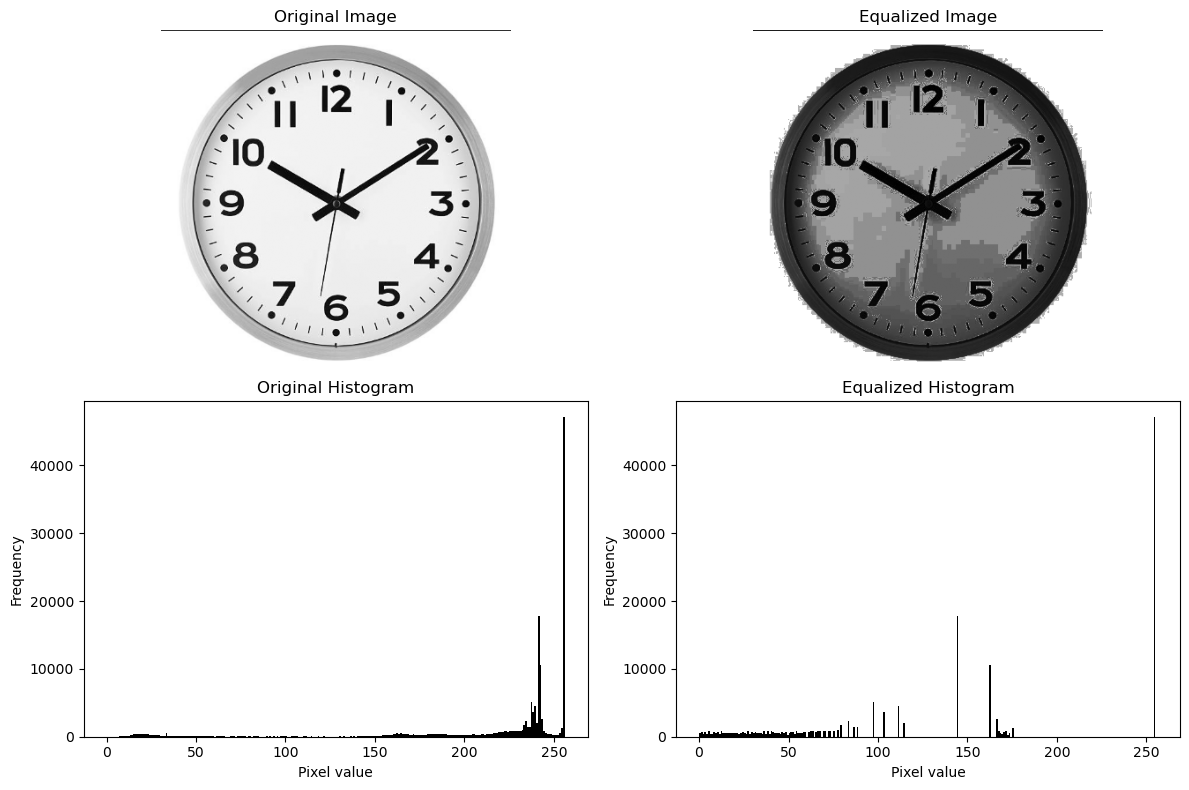

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load image.")
        return None
    return image

def Manual_equalizeHist(image):
    M,N = image.shape
    total_pixels = M * N
    L = 256
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
    
    probability = np.zeros(L, dtype=np.float32)
    for i in range(L):
        probability[i] = histogram[i] / total_pixels
        
    cum_sum_array = np.zeros(L, dtype=np.float32)
    trans_func = np.zeros(L, dtype=np.float32)
    for i in range(L):
        cum_sum = 0.0
        for j in range(i+1):
            cum_sum += probability[j]
        cum_sum_array[i] = cum_sum
        trans_func[i] = (L-1) * cum_sum_array[i]
        if trans_func[i] > 255:
            trans_func[i] = 255
            
    equalized_img = cv2.LUT(image, trans_func.astype(np.uint8))
    return histogram, probability, cum_sum_array, trans_func, equalized_img

def plot_histogram(img, title, pos):
    plt.subplot(2, 2, pos)
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='black')
    plt.title(title)
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')

image_path = 'input images/input3.png'
image = load_image(image_path)
if image is None:
    exit()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist, prob, cdf, trans, eq_img = Manual_equalizeHist(gray)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eq_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plot_histogram(gray, 'Original Histogram', 3)
plot_histogram(eq_img, 'Equalized Histogram', 4)

plt.tight_layout()
plt.show()
